In [1]:
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs
import cmocean as cm
from xgcm import Grid

In [8]:
session=cc.database.create_session()
expts = ['panant-01-zstar','panant-01-hycom1','panant-01-zstar-v13','panant-01-hycom1-v13']

In [3]:
client = Client()
client

<Client: 'tcp://127.0.0.1:34971' processes=4 threads=16, memory=44.92 GiB>

In [4]:
depth = cc.querying.getvar('panant-01-zstar','deptho',session,n=1)
land_mask = np.squeeze(depth.values)*0
land_mask[np.isnan(land_mask)] = 1
land_mask = np.where(land_mask==1,land_mask,np.nan)

## Looking for DSW layer depth

In [9]:
%%time
hmo_h1 = cc.querying.getvar('panant-01-zstar-v13','hmo', session).sel(xh=slice(-230, -140)).sel(time=slice('1998-01-01','2000-12-31')).mean('time').load()

CPU times: user 41.8 s, sys: 4.4 s, total: 46.2 s
Wall time: 1min 2s


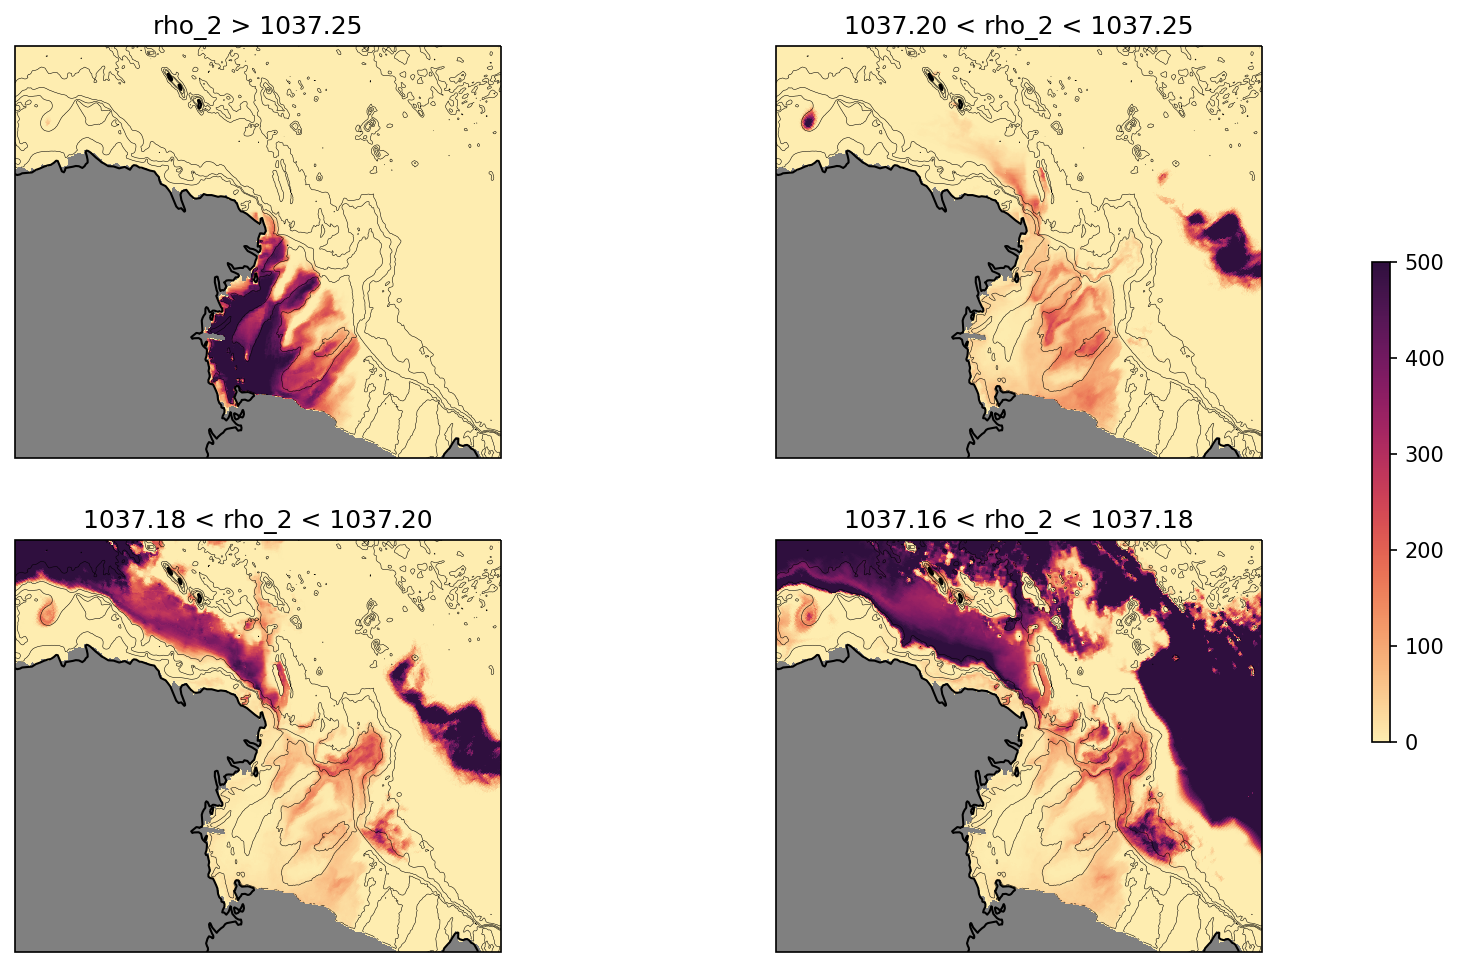

In [23]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_h1.sel(rho2_l=slice(1037.25,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.25')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=70
hh = hmo_h1.sel(rho2_l=slice(1037.20,1037.25)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.20 < rho_2 < 1037.25')
#ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=68
hh = hmo_h1.sel(rho2_l=slice(1037.18,1037.20)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.18 < rho_2 < 1037.20')
#ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=66
hh = hmo_h1.sel(rho2_l=slice(1037.16,1037.18)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.16 < rho_2 < 1037.18')
#ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

#ax.set_boundary(circle, transform=ax.transAxes)
#plt.savefig('figures/Ross.png')

In [17]:
hmo_h1.rho2_l

<xarray.DataArray 'rho2_l' (rho2_l: 79)>
array([1016.25    , 1033.394776, 1033.83366 , 1033.921207, 1034.007418,
       1034.092292, 1034.17583 , 1034.258031, 1034.338895, 1034.418423,
       1034.496614, 1034.573468, 1034.648986, 1034.723168, 1034.796012,
       1034.867521, 1034.937692, 1035.006527, 1035.074025, 1035.140187,
       1035.205012, 1035.268501, 1035.330653, 1035.391468, 1035.450947,
       1035.509089, 1035.565894, 1035.621363, 1035.675496, 1035.728291,
       1035.779751, 1035.829873, 1035.878659, 1035.926155, 1035.97303 ,
       1036.019905, 1036.06678 , 1036.113655, 1036.16053 , 1036.207405,
       1036.25428 , 1036.301155, 1036.34803 , 1036.394905, 1036.44178 ,
       1036.488655, 1036.53553 , 1036.582405, 1036.62928 , 1036.676155,
       1036.72303 , 1036.769905, 1036.81678 , 1036.863655, 1036.91053 ,
       1036.957405, 1037.00428 , 1037.037718, 1037.057718, 1037.077718,
       1037.097718, 1037.117718, 1037.137718, 1037.157718, 1037.177718,
       1037.197718, 1037.217718, 1037.237718, 1037.257718, 1037.277718,
       1037.297718, 1037.317718, 1037.337718, 1037.357718, 1037.377718,
       1037.397718, 1037.417718, 1037.477718, 1037.577718])
Coordinates:
  * rho2_l   (rho2_l) float64 1.016e+03 1.033e+03 ... 1.037e+03 1.038e+03
Attributes:
    units:      kg m-3
    long_name:  Target Potential Density at cell center
    axis:       Z
    positive:   down
    edges:      rho2_i

In [32]:
%%time
hmo_v3 = cc.querying.getvar('panant-01-hycom1-v13','hmo', session).sel(xh=slice(-230, -140)).sel(time=slice('1998-01-01','2000-12-31')).mean('time').load()

CPU times: user 38.2 s, sys: 3.86 s, total: 42.1 s
Wall time: 51.2 s


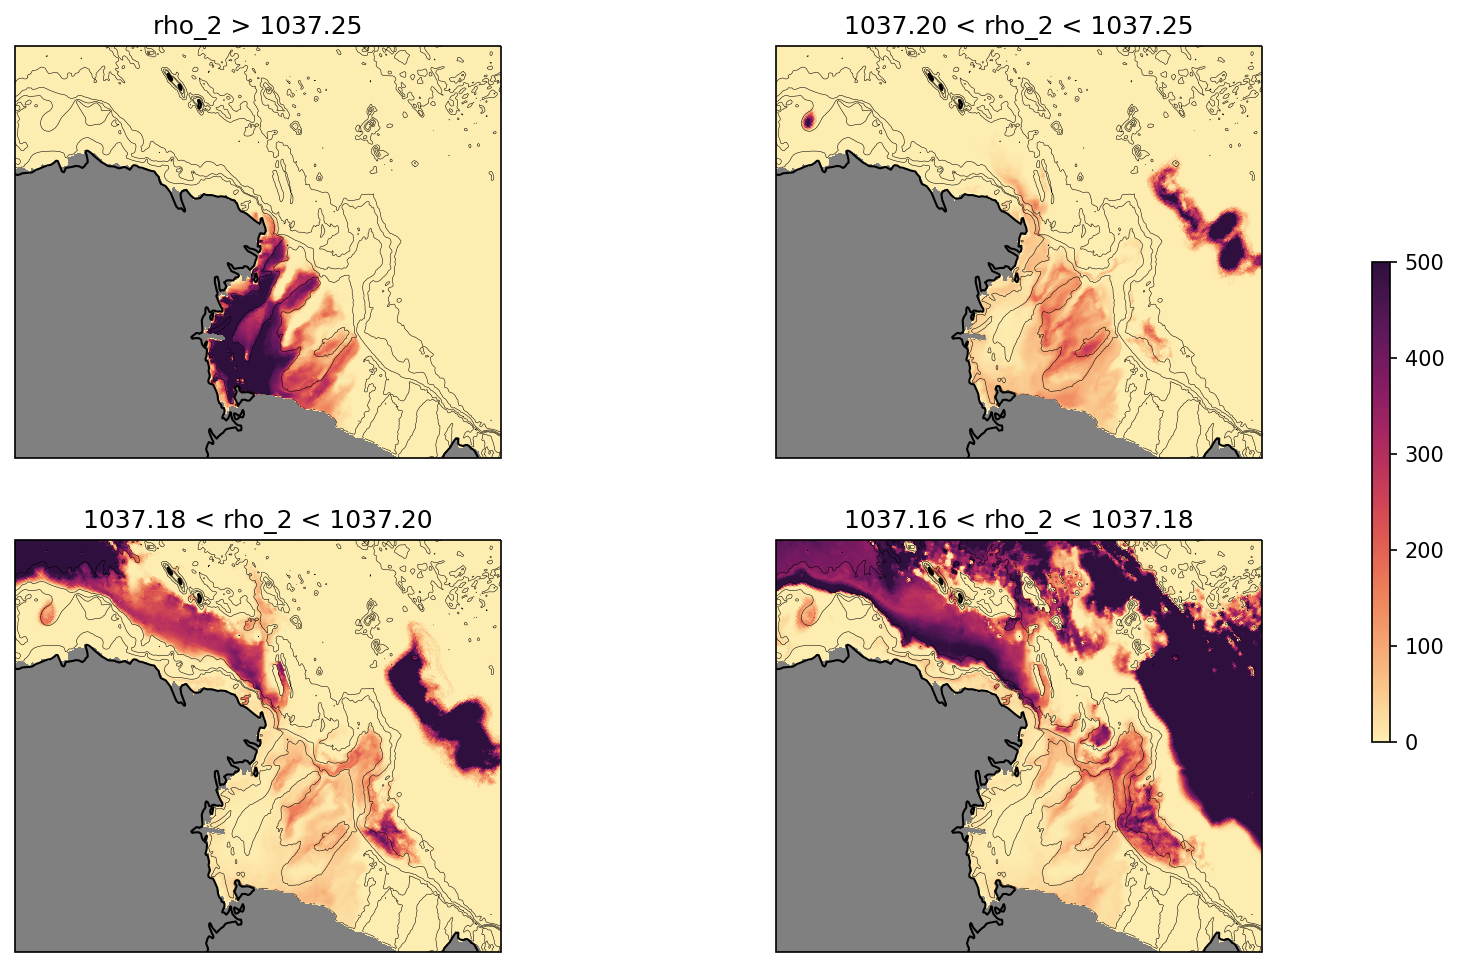

In [33]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_v3.sel(rho2_l=slice(1037.25,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.25')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=70
hh = hmo_v3.sel(rho2_l=slice(1037.20,1037.25)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.20 < rho_2 < 1037.25')
#ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)

ax = plt.subplot(2, 2, 3, projection=projection)
ii=68
hh = hmo_v3.sel(rho2_l=slice(1037.18,1037.20)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.18 < rho_2 < 1037.20')
#ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax = plt.subplot(2, 2, 4, projection=projection)
ii=66
hh = hmo_v3.sel(rho2_l=slice(1037.16,1037.18)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0,vmax=500,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-210, -170, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.16 < rho_2 < 1037.18')
#ax.set_title('rho_2 = %6.2f'%hmo_h1.rho2_l[ii].values)


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

In [34]:
hmo_diff = hmo_h1 - hmo_v3

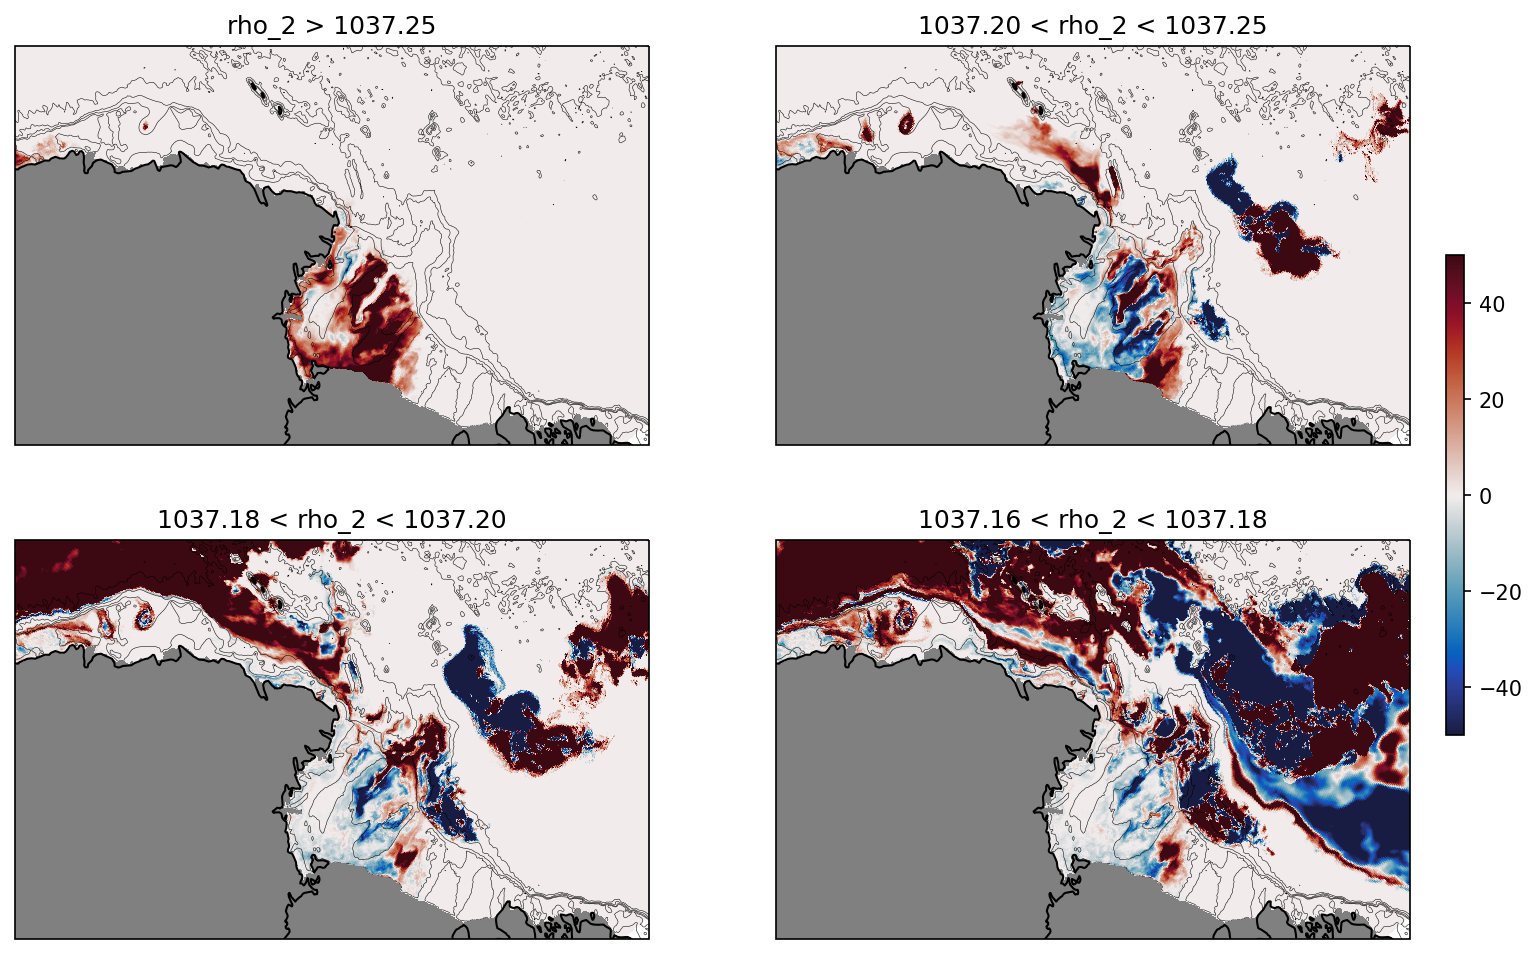

In [35]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = hmo_diff.sel(rho2_l=slice(1037.25,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.25')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = hmo_diff.sel(rho2_l=slice(1037.20,1037.25)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.20 < rho_2 < 1037.25')

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = hmo_diff.sel(rho2_l=slice(1037.18,1037.20)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.18 < rho_2 < 1037.20')


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = hmo_diff.sel(rho2_l=slice(1037.16,1037.18)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-50,vmax=50,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.16 < rho_2 < 1037.18')


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

## Look at transport magnitude

In [36]:
%%time
expt = 'panant-01-zstar-v13'
umo = cc.querying.getvar(expt,'umo', session).sel(xq=slice(-230, -140)).sel(time=slice('1998-01-01','2000-12-31')).mean('time').load()
vmo = cc.querying.getvar(expt,'vmo', session).sel(xh=slice(-230, -140)).sel(time=slice('1998-01-01','2000-12-31')).mean('time').load()
ds = xr.merge([umo, vmo])
ds.coords['xh'].attrs.update(axis='X')
ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yh'].attrs.update(axis='Y')
ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
grid = Grid(ds, periodic=['X'])
u = grid.interp(ds.umo, 'X')
v = grid.interp(ds.vmo, 'Y', boundary='extend')
transport_zstar = ((u**2 + v**2)**(0.5)).load()

CPU times: user 1min 16s, sys: 8.41 s, total: 1min 24s
Wall time: 1min 43s


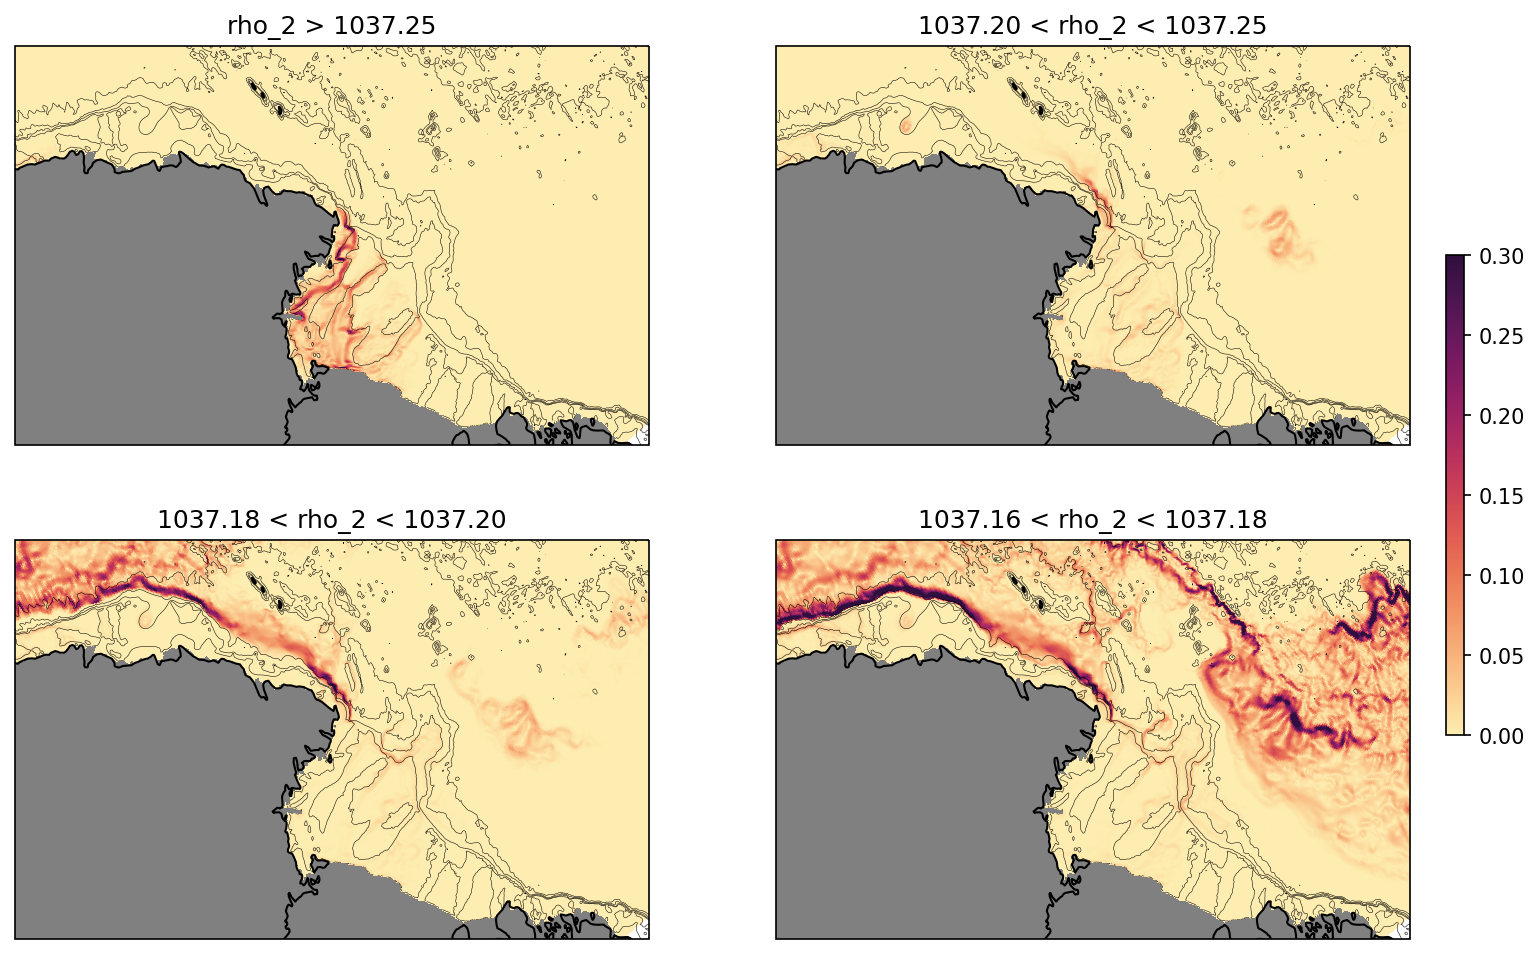

In [37]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (transport_zstar/1e9).sel(rho2_l=slice(1037.25,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.25')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (transport_zstar/1e9).sel(rho2_l=slice(1037.20,1037.25)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.20 < rho_2 < 1037.25')

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (transport_zstar/1e9).sel(rho2_l=slice(1037.18,1037.20)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.18 < rho_2 < 1037.20')


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (transport_zstar/1e9).sel(rho2_l=slice(1037.16,1037.18)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.16 < rho_2 < 1037.18')


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

In [45]:
%%time
expt = 'panant-01-hycom1-v13'
umo = cc.querying.getvar(expt,'umo', session).sel(xq=slice(-230, -140)).sel(time=slice('1998-01-01','2000-12-31')).mean('time').load()
vmo = cc.querying.getvar(expt,'vmo', session).sel(xh=slice(-230, -140)).sel(time=slice('1998-01-01','2000-12-31')).mean('time').load()
ds = xr.merge([umo, vmo])
ds.coords['xh'].attrs.update(axis='X')
ds.coords['xq'].attrs.update(axis='X', c_grid_axis_shift=0.5)
ds.coords['yh'].attrs.update(axis='Y')
ds.coords['yq'].attrs.update(axis='Y', c_grid_axis_shift=0.5)
grid = Grid(ds, periodic=['X'])
u = grid.interp(ds.umo, 'X')
v = grid.interp(ds.vmo, 'Y', boundary='extend')
transport_hycom1 = ((u**2 + v**2)**(0.5)).load()

CPU times: user 1min 21s, sys: 7.82 s, total: 1min 29s
Wall time: 1min 43s


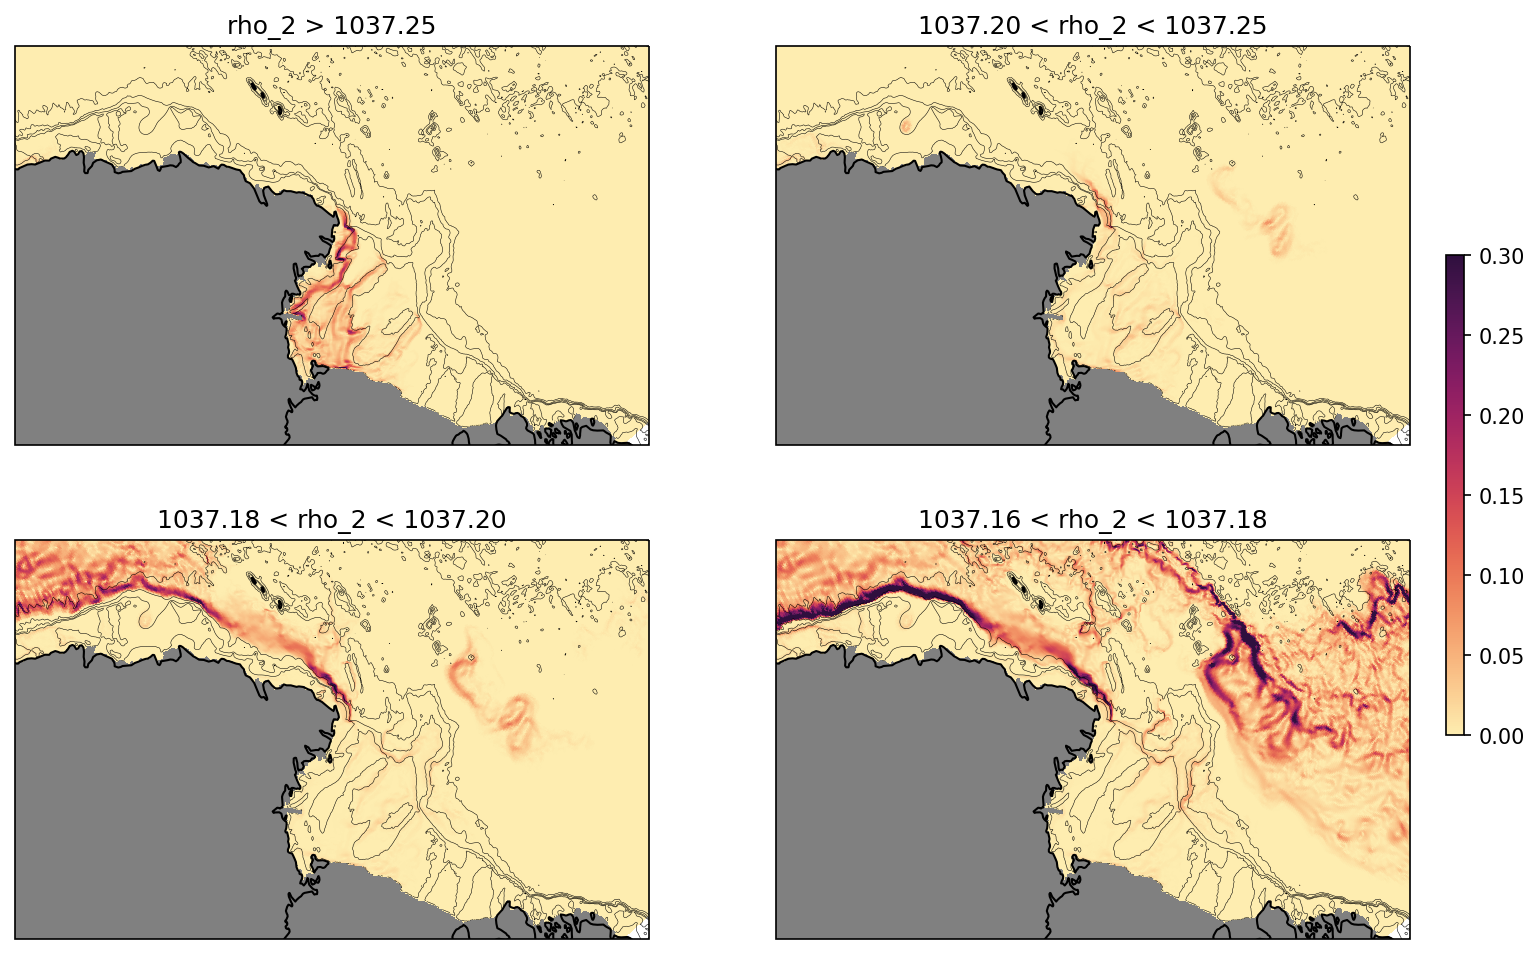

In [46]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (transport_hycom1/1e9).sel(rho2_l=slice(1037.25,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.25')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (transport_hycom1/1e9).sel(rho2_l=slice(1037.20,1037.25)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.20 < rho_2 < 1037.25')

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (transport_hycom1/1e9).sel(rho2_l=slice(1037.18,1037.20)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.18 < rho_2 < 1037.20')


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (transport_hycom1/1e9).sel(rho2_l=slice(1037.16,1037.18)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.matter,vmin=0.0,vmax=0.3,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.16 < rho_2 < 1037.18')


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

In [47]:
transport_diff = transport_hycom1 - transport_zstar

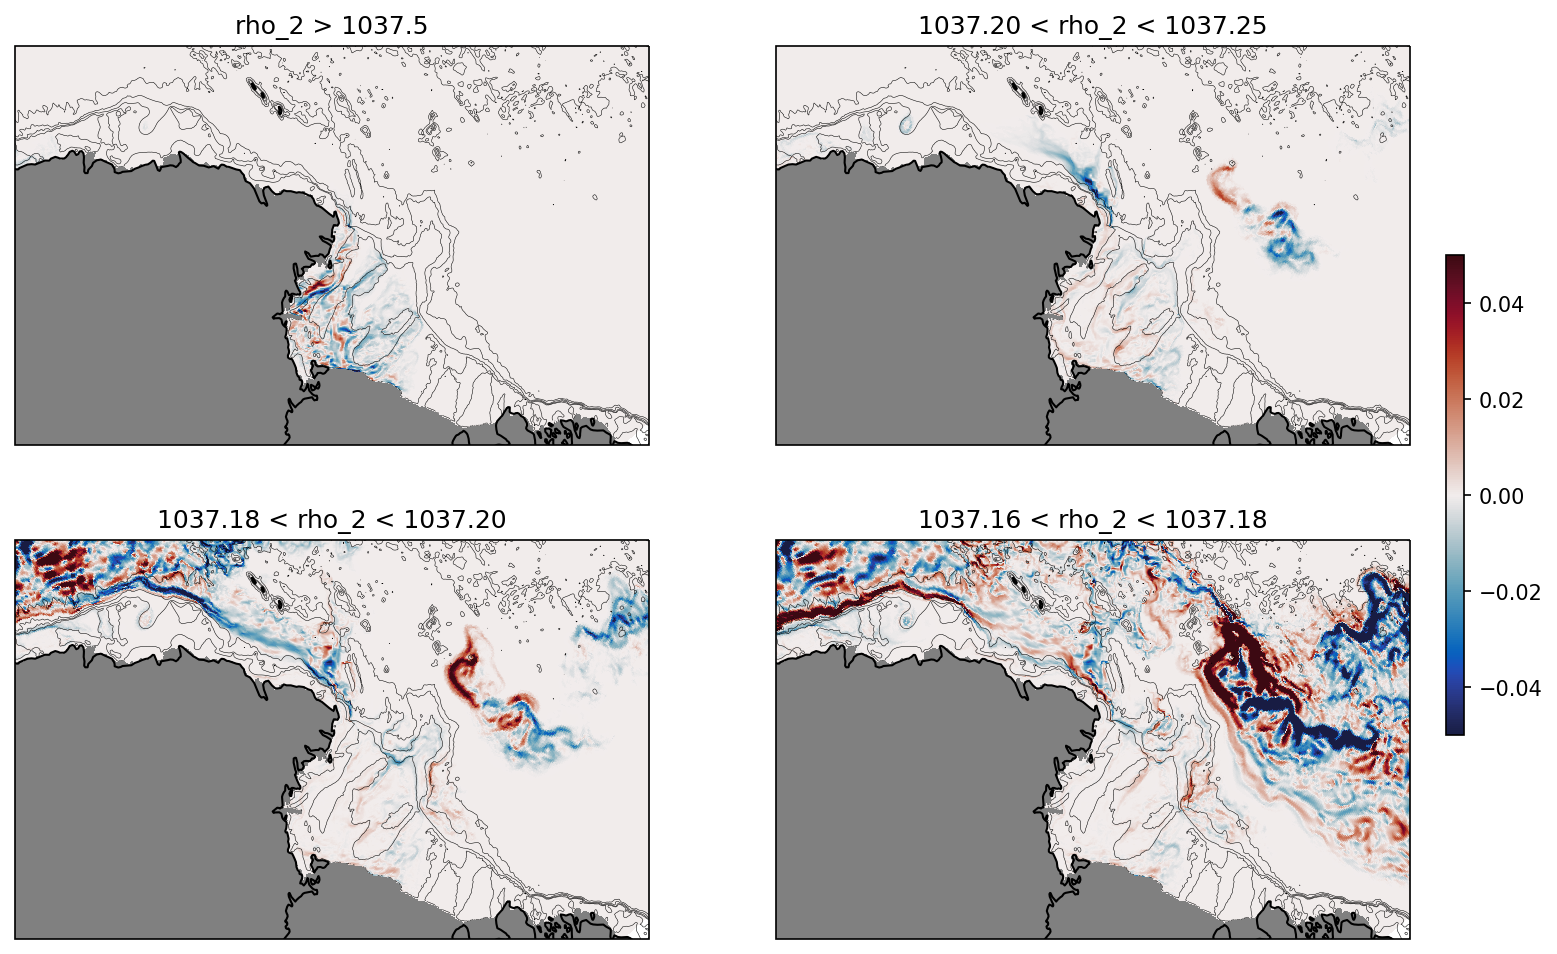

In [48]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(12, 8), dpi=150)

ax = plt.subplot(2, 2, 1, projection=projection)
hh = (transport_diff/1e9).sel(rho2_l=slice(1037.25,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('rho_2 > 1037.5')

ax = plt.subplot(2, 2, 2, projection=projection)
ii=62
hh = (transport_diff/1e9).sel(rho2_l=slice(1037.20,1037.25)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.20 < rho_2 < 1037.25')

ax = plt.subplot(2, 2, 3, projection=projection)
ii=61
hh = (transport_diff/1e9).sel(rho2_l=slice(1037.18,1037.20)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.18 < rho_2 < 1037.20')


ax = plt.subplot(2, 2, 4, projection=projection)
ii=60
hh = (transport_diff/1e9).sel(rho2_l=slice(1037.16,1037.18)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
ax.set_title('1037.16 < rho_2 < 1037.18')


ax_c = plt.axes([0.92,0.3,0.01,0.4])
plt.colorbar(hh,ax_c)

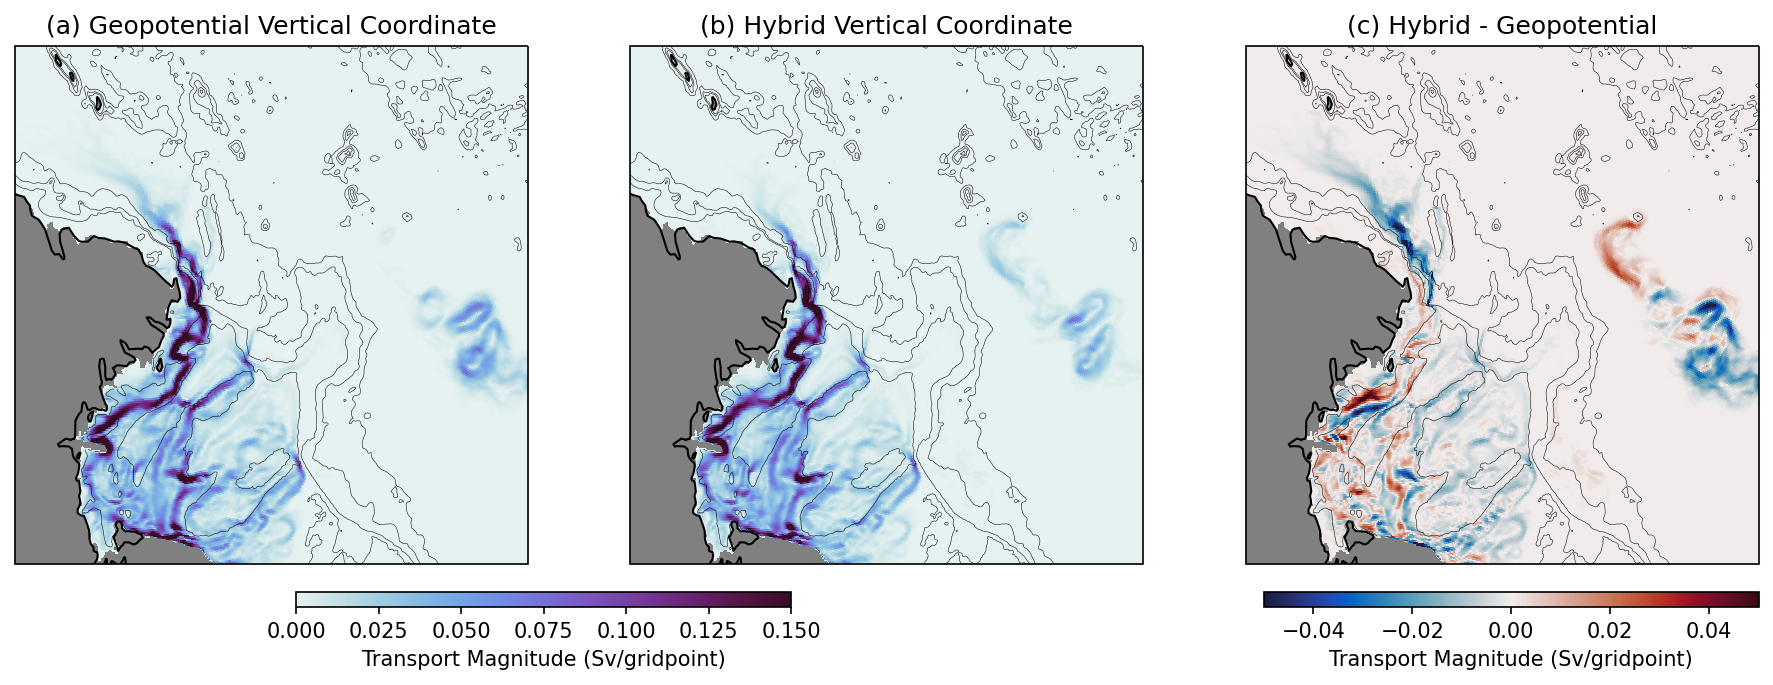

In [49]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-195)

fig = plt.figure(figsize=(15, 5), dpi=150)

ax = plt.subplot(1, 3, 1, projection=projection)
hh = (transport_zstar/1e9).sel(rho2_l=slice(1037.2,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.dense,vmin=0,vmax=0.15,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-200, -170, -77, -66], crs=ccrs.PlateCarree())
ax.set_title('(a) Geopotential Vertical Coordinate')



ax = plt.subplot(1, 3, 2, projection=projection)
hh = (transport_hycom1/1e9).sel(rho2_l=slice(1037.2,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.dense,vmin=0,vmax=0.15,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-200, -170, -77, -66], crs=ccrs.PlateCarree())
ax.set_title('(b) Hybrid Vertical Coordinate')



ax = plt.subplot(1, 3, 3, projection=projection)
hh2 = (transport_diff/1e9).sel(rho2_l=slice(1037.2,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.05,vmax=0.05,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-200, -170, -77, -66], crs=ccrs.PlateCarree())
ax.set_title('(c) Hybrid - Geopotential')

ax_c = plt.axes([0.25,0.1,0.22,0.02])
plt.colorbar(hh,ax_c,orientation='horizontal')
plt.xlabel('Transport Magnitude (Sv/gridpoint)')

ax_c2 = plt.axes([0.68,0.1,0.22,0.02])
plt.colorbar(hh2,ax_c2,orientation='horizontal')
plt.xlabel('Transport Magnitude (Sv/gridpoint)')

plt.savefig('/g/data/x77/amh157/mom6-panan-diagnostics/figures/RossSeaExport.png',dpi=150)

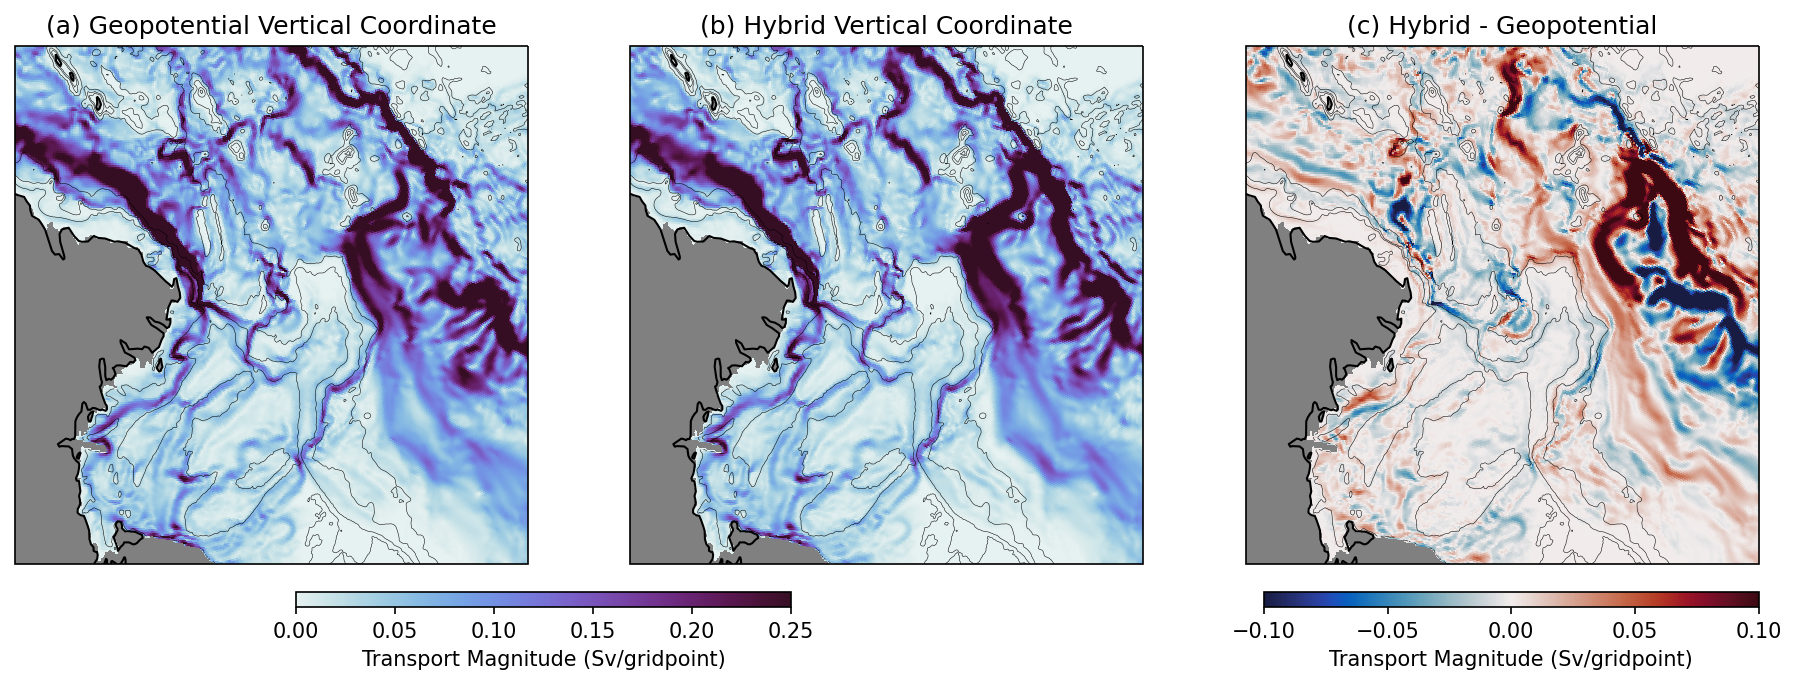

In [51]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-195)

fig = plt.figure(figsize=(15, 5), dpi=150)

ax = plt.subplot(1, 3, 1, projection=projection)
hh = (transport_zstar/1e9).sel(rho2_l=slice(1037.15,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.dense,vmin=0,vmax=0.25,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-200, -170, -77, -66], crs=ccrs.PlateCarree())
ax.set_title('(a) Geopotential Vertical Coordinate')



ax = plt.subplot(1, 3, 2, projection=projection)
hh = (transport_hycom1/1e9).sel(rho2_l=slice(1037.15,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.dense,vmin=0,vmax=0.25,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-200, -170, -77, -66], crs=ccrs.PlateCarree())
ax.set_title('(b) Hybrid Vertical Coordinate')



ax = plt.subplot(1, 3, 3, projection=projection)
hh2 = (transport_diff/1e9).sel(rho2_l=slice(1037.15,1038)).sum('rho2_l').plot(ax=ax,transform=ccrs.PlateCarree(),cmap=cm.cm.balance,vmin=-0.1,vmax=0.1,add_colorbar=False)
depth.plot.contour(ax=ax,levels=[500, 1000, 2000, 3000],linewidths=0.25,colors='k',transform=ccrs.PlateCarree())
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
ax.coastlines(resolution='50m')
ax.set_extent([-200, -170, -77, -66], crs=ccrs.PlateCarree())
ax.set_title('(c) Hybrid - Geopotential')

ax_c = plt.axes([0.25,0.1,0.22,0.02])
plt.colorbar(hh,ax_c,orientation='horizontal')
plt.xlabel('Transport Magnitude (Sv/gridpoint)')

ax_c2 = plt.axes([0.68,0.1,0.22,0.02])
plt.colorbar(hh2,ax_c2,orientation='horizontal')
plt.xlabel('Transport Magnitude (Sv/gridpoint)')

plt.savefig('/g/data/x77/amh157/mom6-panan-diagnostics/figures/RossSeaExport2.png',dpi=150)

## Plotting surface speed, making movies, etc.

In [20]:
speed = cc.querying.getvar('panant-hycom1','speed', session)

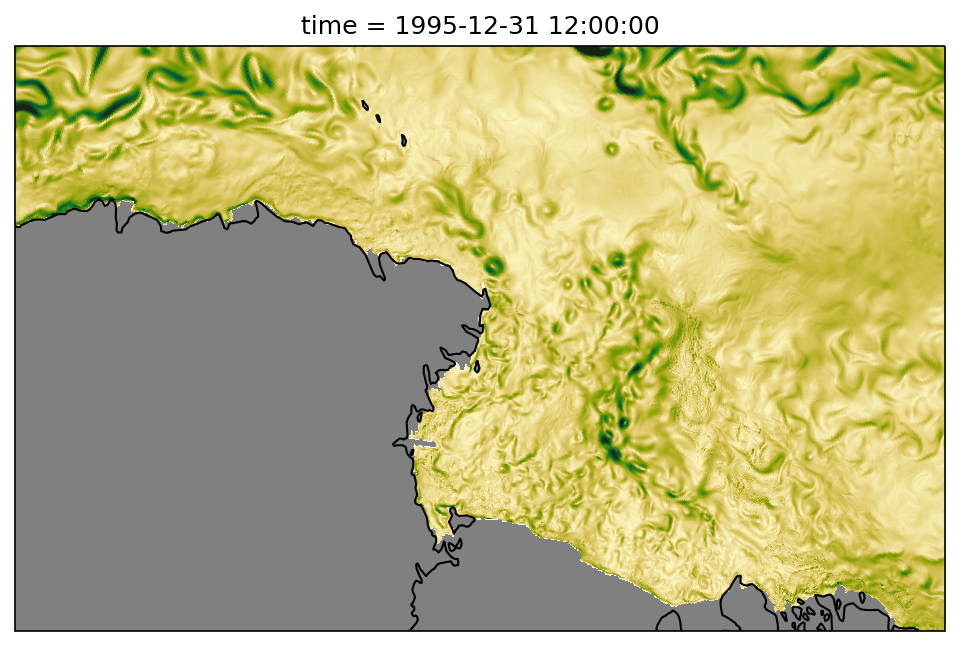

In [22]:
projection=ccrs.Stereographic(central_latitude=-72, central_longitude=-190)

fig = plt.figure(figsize=(8, 6), dpi=150)
ax = plt.subplot(1, 1, 1, projection=projection)
speed.isel(time=-1).plot(ax=ax,add_colorbar=False,vmin=0,vmax=0.6,
                     transform=ccrs.PlateCarree(),cmap=cm.cm.speed)
ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')

ax.coastlines(resolution='50m')
ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())
#ax.set_boundary(circle, transform=ax.transAxes)
#plt.savefig('figures/Ross.png')


In [ ]:
fig = plt.figure(figsize=(8, 6), dpi=150)
for ii in range(speed.time.size):
    
    speed_frame = speed.isel(time=ii)
    
    ax = plt.subplot(1, 1, 1, projection=projection)
    speed_frame.plot(add_colorbar=False,vmin=0,vmax=0.6,
                     transform=ccrs.PlateCarree(),cmap=cm.cm.speed)
    ax.contourf(depth.xh,depth.yh,land_mask,transform=ccrs.PlateCarree(),colors='grey')
    ax.coastlines(resolution='50m')
    ax.set_extent([-220, -160, -79, -65], crs=ccrs.PlateCarree())


    plt.title('')
    plt.tight_layout()
    
    filestr = '/g/data/x77/amh157/ross-frames/image%04d.png' % ii
    plt.savefig(filestr,dpi=150)
    plt.clf()
    if np.mod(ii,10)==0:
        print(ii)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850


In [8]:
umo_h1 = cc.querying.getvar('panant-01-zstar','umo', session)
umo_h1

<xarray.DataArray 'umo' (time: 108, rho2_l: 70, yh: 845, xq: 3601)>
dask.array<concatenate, shape=(108, 70, 845, 3601), dtype=float32, chunksize=(1, 19, 228, 972), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -81.11 -81.07 -81.02 -80.98 ... -37.3 -37.22 -37.14
  * rho2_l   (rho2_l) float64 1.016e+03 1.033e+03 ... 1.038e+03 1.038e+03
  * time     (time) object 1991-01-16 12:00:00 ... 1999-12-16 12:00:00
  * xq       (xq) float64 -280.0 -279.9 -279.8 -279.7 ... 79.7 79.8 79.9 80.0
Attributes:
    units:          kg s-1
    long_name:      Ocean Mass X Transport
    cell_methods:   rho2_l:sum yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  ocean_mass_x_transport
    interp_method:  none
    time_bnds:      <xarray.DataArray 'time_bnds' (time: 108, nv: 2)>\ndask.a...
    ncfiles:        ['/g/data4/ik11/outputs/mom6-panan/panant-01-zstar/output...

In [7]:
umo_h1 = cc.querying.getvar('panant-v2','umo', session)
umo_h1

<xarray.DataArray 'umo' (time: 96, rho2_l: 70, yh: 1690, xq: 7201)>
dask.array<concatenate, shape=(96, 70, 1690, 7201), dtype=float32, chunksize=(1, 12, 287, 1225), chunktype=numpy.ndarray>
Coordinates:
  * yh       (yh) float64 -81.1 -81.08 -81.06 -81.03 ... -37.16 -37.12 -37.08
  * rho2_l   (rho2_l) float64 1.014e+03 1.028e+03 ... 1.038e+03 1.038e+03
  * time     (time) object 1991-01-16 12:00:00 ... 1998-12-16 12:00:00
  * xq       (xq) float64 -280.0 -279.9 -279.9 -279.8 ... 79.85 79.9 79.95 80.0
Attributes:
    units:          kg s-1
    long_name:      Ocean Mass X Transport
    cell_methods:   rho2_l:sum yh:sum xq:point time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  ocean_mass_x_transport
    interp_method:  none
    time_bnds:      <xarray.DataArray 'time_bnds' (time: 96, nv: 2)>\ndask.ar...
    ncfiles:        ['/g/data4/ik11/outputs/mom6-panan/panant-v2/output000/19...

In [13]:
session2 = cc.database.create_session()

In [14]:
expt = '01deg_jra55v13_ryf9091'
start_time = '2060-01-01'
end_time = '2060-12-31'
tx_trans_rho = cc.querying.getvar(expt=expt,session=session2,variable='tx_trans_rho',frequency='1 monthly',start_time=start_time,end_time=end_time)

In [ ]:
tx_trans_rho